## Exercise
- How can you modify the units of the figures?  


> Primero importamos las librerias e invocamos la variable del DataFrame

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

CO2Data = pd.read_csv("../../Datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")



> Creamos la paleta de colores para nuestros gráficos de seaborn

In [42]:
# Crear el arreglo de colores
colors = ["#d3a446", "#277272"]

# agregamos el arreglo de colores al set_palet
sns.set(font_scale=2, style="ticks", palette=colors)

Para responder a la pregunta de como se cambian las unidades en las gráficas primero colocamos el ejemplo del apunte de Seaborn

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5056\998179431.py:11: SyntaxWarning: invalid escape sequence '\m'
  ax.set(xlabel='', ylabel='TA ($\mu mol \; kg^{-1}$)') # etiquetas a los ejes


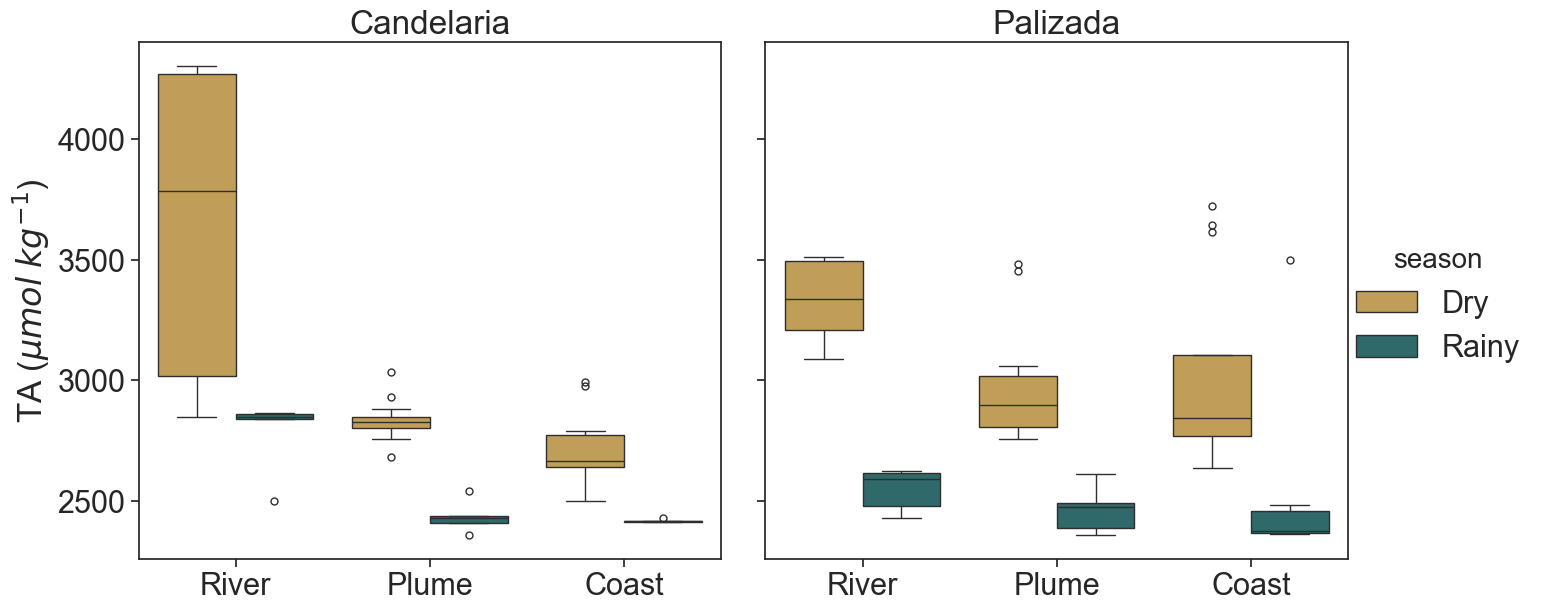

In [43]:
ax = sns.catplot(data=CO2Data, #sns.catplot hace un gráfico categórico
                 x = "area", y = "ta_micromol_kg", # le dice que poner en cada eje
                 # x = categorias  y = valores de la variable numerica
                 hue="season", col="estuary", 
                 # hue : diferencia los datos por color segun la columna season
                 # col : separa la gráfica en columnas distintas para cada valor de estuary
                 kind= "box",
                 # kind : tipo de grafico puede ser box, violin, bar, etc
                 height=7, aspect=1) # controla el tamaño y proporcion de cada subgráfico

ax.set(xlabel='', ylabel='TA ($\mu mol \; kg^{-1}$)') # etiquetas a los ejes

ax.set_titles(col_template="{col_name}", row_template="{row_name}") # cambia como se muestran los titulos de cada subgráfico
# col name muestra solo el nombre de la columna
# row name muestra el nombre limpio

plt.setp(ax._legend.get_title(), fontsize=20) #cambia el tamaño de la letra del titulo de la leyenda

sns.despine(top=False , right=False) # quita las lineas de los ejes para que se vea mas limpio

plt.show()

En la linea de código:

> ax.set(xlabel='', ylabel='TA ($\mu mol \; kg^{-1}$)')

son los parametros de los ejes (axis), la etiqueta del eje *x* (xlabel) que aparece con comillas simples indica que lo deja sin nombre y en la etiqueta del eje *y* las cantidades de la columna gráficada

**¿Cómo cambio las unidades del eje *y* ( 2500, 3000, 3500, 4000)?** 

> Metemos un ciclo *for* antes del *plt.show()*

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5056\185318834.py:11: SyntaxWarning: invalid escape sequence '\m'
  ax.set(xlabel='', ylabel='TA ($\mu mol \; kg^{-1}$)') # etiquetas a los ejes


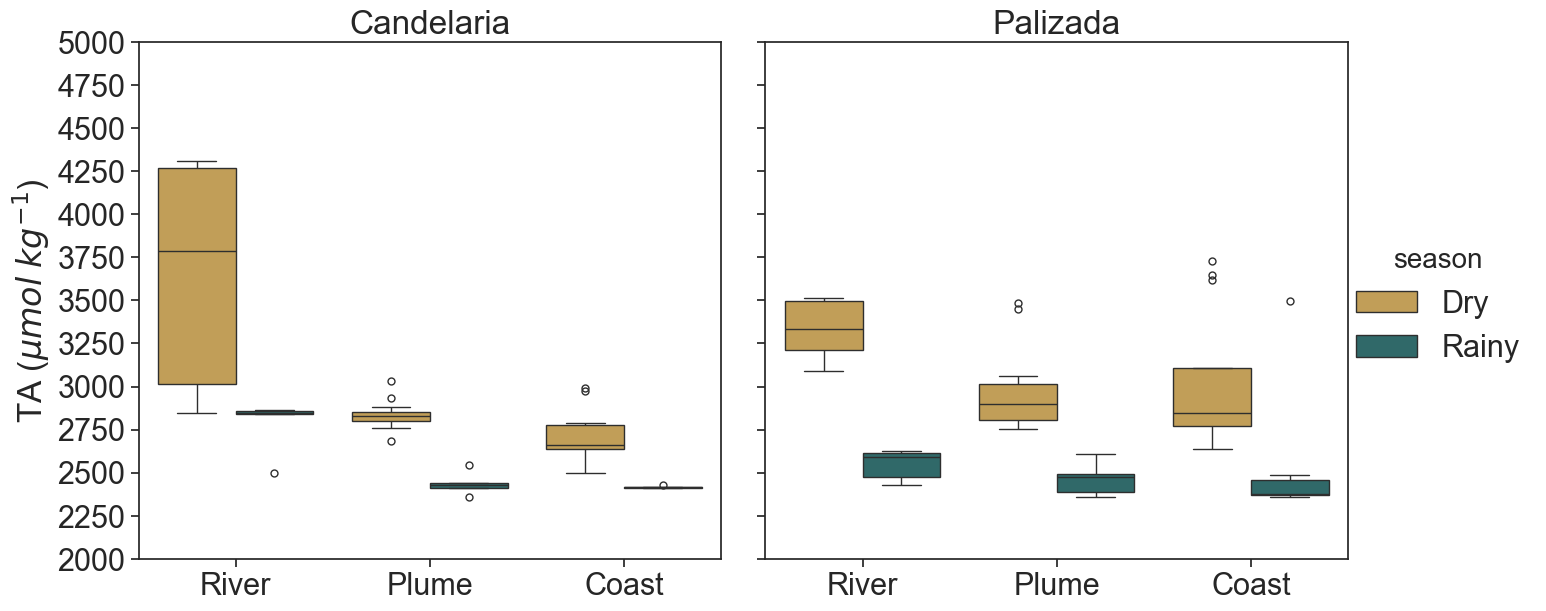

In [44]:
ax = sns.catplot(data=CO2Data, #sns.catplot hace un gráfico categórico
                 x = "area", y = "ta_micromol_kg", # le dice que poner en cada eje
                 # x = categorias  y = valores de la variable numerica
                 hue="season", col="estuary", 
                 # hue : diferencia los datos por color segun la columna season
                 # col : separa la gráfica en columnas distintas para cada valor de estuary
                 kind= "box",
                 # kind : tipo de grafico puede ser box, violin, bar, etc
                 height=7, aspect=1) # controla el tamaño y proporcion de cada subgráfico

ax.set(xlabel='', ylabel='TA ($\mu mol \; kg^{-1}$)') # etiquetas a los ejes

ax.set_titles(col_template="{col_name}", row_template="{row_name}") # cambia como se muestran los titulos de cada subgráfico
# col name muestra solo el nombre de la columna
# row name muestra el nombre limpio

plt.setp(ax._legend.get_title(), fontsize=20) #cambia el tamaño de la letra del titulo de la leyenda

for a in ax.axes.flat:
    a.set_yticks(range(2000, 5001, 250)) # en el eje y el rango de valores de corra de 2000 a 5000 cada 250 unidades

sns.despine(top=False , right=False) # quita las lineas de los ejes para que se vea mas limpio
plt.show()

O si se quiere cambiar que las unidades de $\mu mol \; kg^{-1}$ se muestren en $m mol \; kg^{-1}$ solo se divide entre 1000 el eje *y* con un FuncFormater de matplotlib

En este caso se dividen todos los valores del eje y sobre 1000 **sin tocar los datos reales**, solo como se muestran

<>:13: SyntaxWarning: invalid escape sequence '\;'
<>:13: SyntaxWarning: invalid escape sequence '\;'
C:\Users\Huawei\AppData\Local\Temp\ipykernel_5056\2065866253.py:13: SyntaxWarning: invalid escape sequence '\;'
  ax.set(xlabel='', ylabel='TA ($mmol \; kg^{-1}$)') # etiquetas a los ejes


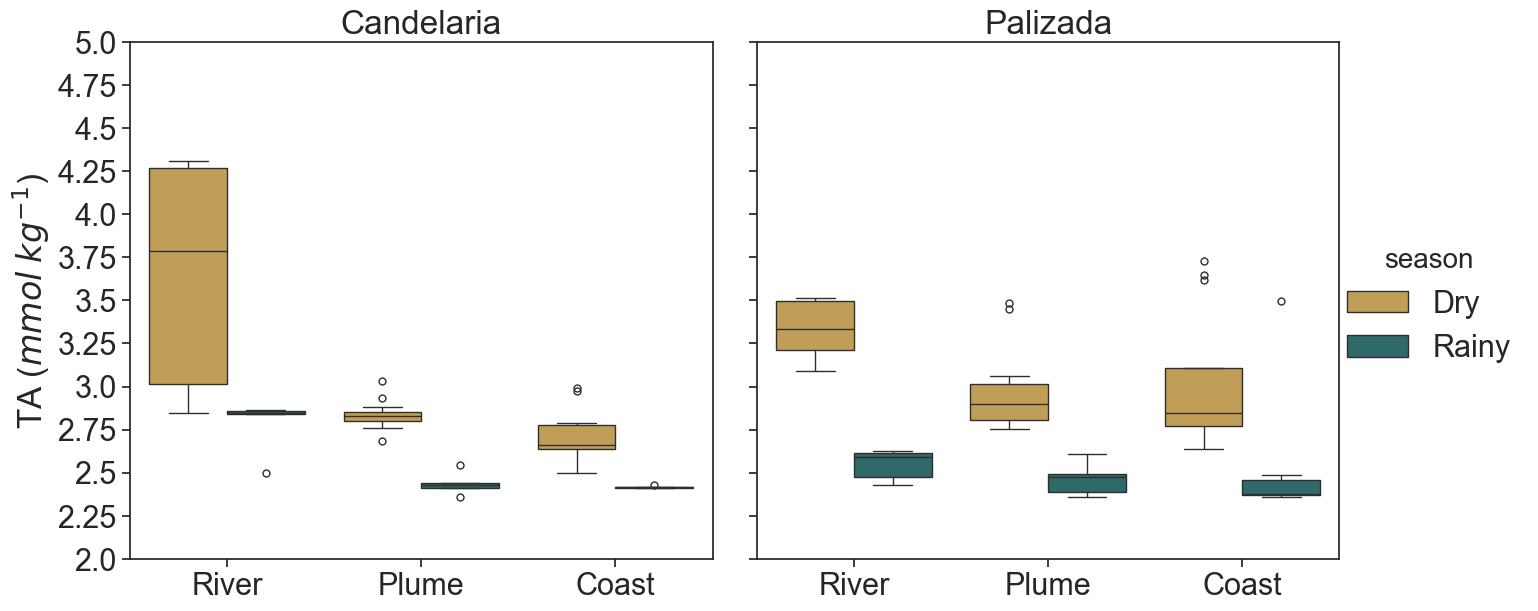

In [45]:
import matplotlib.ticker as ticker

ax = sns.catplot(data=CO2Data, #sns.catplot hace un gráfico categórico
                 x = "area", y = "ta_micromol_kg", # le dice que poner en cada eje
                 # x = categorias  y = valores de la variable numerica
                 hue="season", col="estuary", 
                 # hue : diferencia los datos por color segun la columna season
                 # col : separa la gráfica en columnas distintas para cada valor de estuary
                 kind= "box",
                 # kind : tipo de grafico puede ser box, violin, bar, etc
                 height=7, aspect=1) # controla el tamaño y proporcion de cada subgráfico

ax.set(xlabel='', ylabel='TA ($mmol \; kg^{-1}$)') # etiquetas a los ejes

for a in ax.axes.flat:
    a.yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda y, _: y/1000)
    )


ax.set_titles(col_template="{col_name}", row_template="{row_name}") # cambia como se muestran los titulos de cada subgráfico
# col name muestra solo el nombre de la columna
# row name muestra el nombre limpio

plt.setp(ax._legend.get_title(), fontsize=20) #cambia el tamaño de la letra del titulo de la leyenda

for a in ax.axes.flat:
    a.set_yticks(range(2000, 5001, 250)) # en el eje y el rango de valores de corra de 2000 a 5000 cada 250 unidades

sns.despine(top=False , right=False) # quita las lineas de los ejes para que se vea mas limpio
plt.show()

- Check the examples at https://seaborn.pydata.org/ and create your own figures. If possible, use your own data.

Descargamos el archivo .zip de ejemplo de https://www.ibm.com/docs/es/SSS9AV2/attachments/Sample.Data.v3.zip y lo guardamos en la carpeta /Datos, lo descomprimimos y nos crea la carpeta /Sample.Data.v3 donde hay dos carpetas, abrimos / Sample Data v3 y usaremos Inventory_v2.csv pero como la ruta del archivo es muy larga copiaremos y pegamos en la carpeta de datos para que sea mas facil poner el path.

Lo convertimos en un DataFrame con Pandas y exploramos los titulos de cada columna:

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Inventory = pd.read_csv("../../Datos/Inventory_v2.csv")

print(Inventory.columns)
print(Inventory.head(3))

Index(['product.partNumber', 'location.locationIdentifier', 'inventoryType',
       'quantity', 'quantityUnits', 'value', 'valueCurrency',
       'reservationOrders', 'daysOfSupply', 'shelfLife', 'reorderLevel',
       'expectedLeadTime', 'quantityUpperThreshold', 'quantityLowerThreshold',
       'daysOfSupplyUpperThreshold', 'daysOfSupplyLowerThreshold',
       'expiringThreshold', 'plannerCode', 'velocityCode',
       'inventoryParentType', 'class', 'segment'],
      dtype='object')
  product.partNumber location.locationIdentifier inventoryType  quantity  \
0         PS-SL-A287                        LT-1       PRODUCT        25   
1         PS-SL-A288                        LT-1       PRODUCT        20   
2         PS-SL-H309                        LT-1       PRODUCT         3   

  quantityUnits    value valueCurrency  reservationOrders  daysOfSupply  \
0            EA  31250.0           USD                  2            19   
1            EA  25000.0           USD                 

## **Numéricas para distribución y tendencia**
- ### Histograma de cantidades


<Axes: xlabel='quantity', ylabel='Count'>

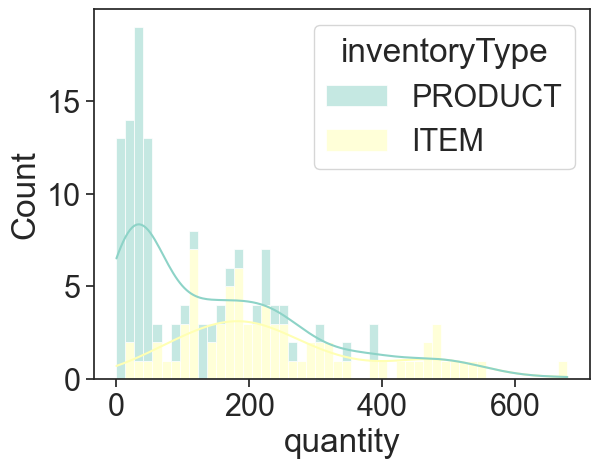

In [47]:
sns.histplot(data=Inventory, 
             x="quantity", hue="inventoryType",
             bins=50,
             palette="Set3", 
             linewidth=.5,
             multiple="stack",
             kde=True
             )


- ### Histograma de valores monetarios


c:\Users\Huawei\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='value', ylabel='Count'>

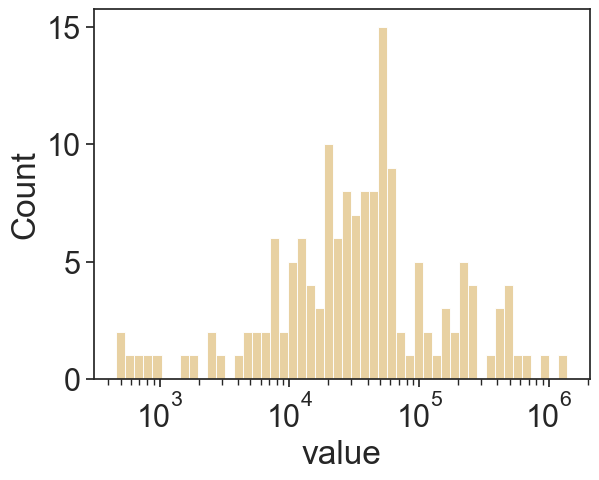

In [53]:
sns.histplot(data=Inventory, 
             x="value", 
             bins=50, 
             kde=True,
             log_scale=True,
             )


- ### Boxplot de dayOfSupply

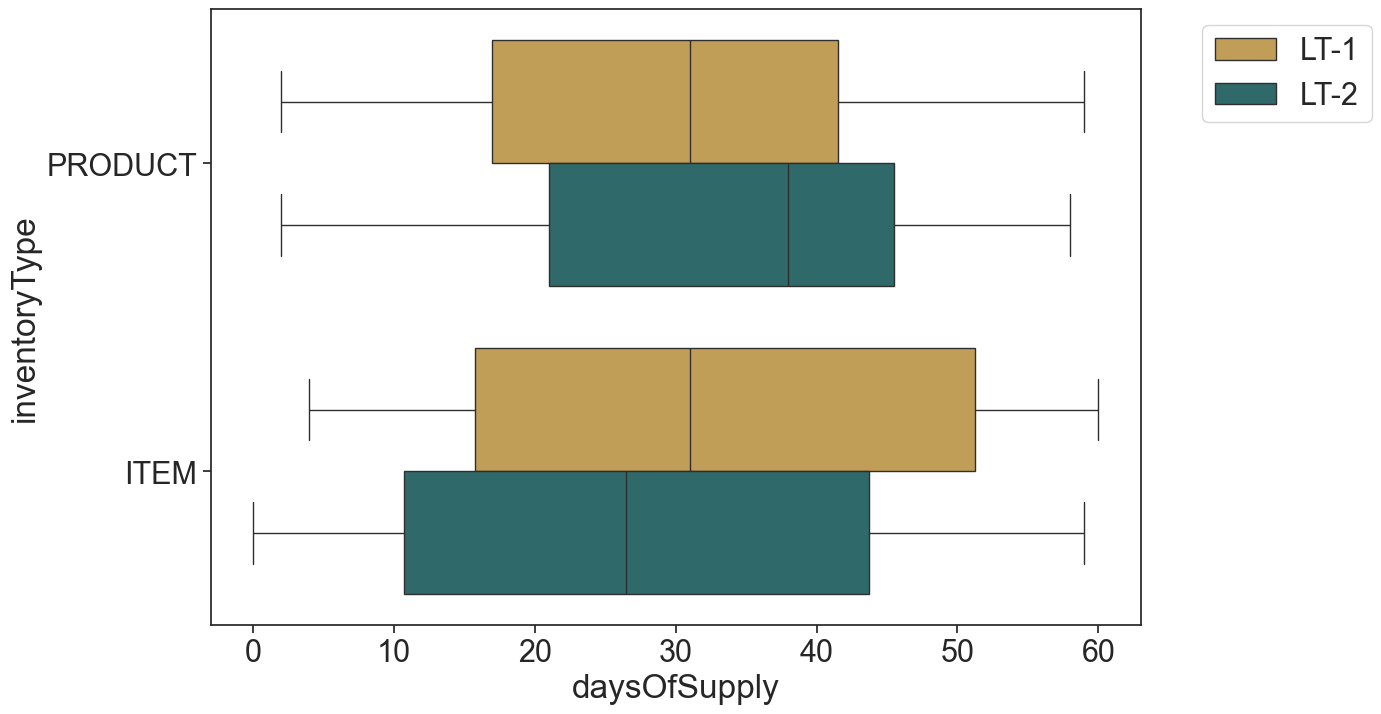

In [ ]:
plt.figure(figsize=(12,8))  # ancho=12, alto=8
sns.boxplot(data=Inventory, 
            x="daysOfSupply", y="inventoryType",
            hue="location.locationIdentifier"
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# mueve la etiqueta a la esquina superior derecha
plt.show()

## **Categóricas vs numéricas (comparaciones)**

- ### Boxplot de value por plannerCode

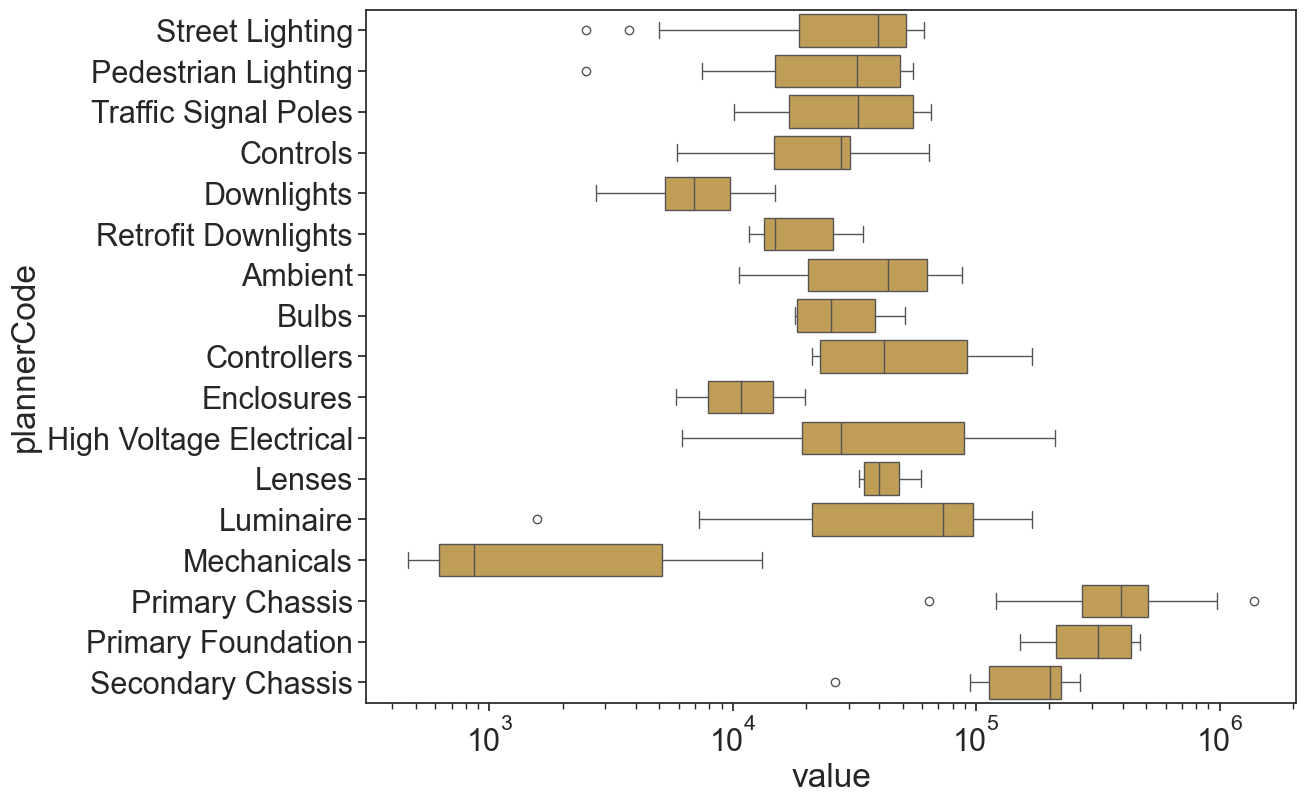

In [65]:
plt.figure(figsize=(12,9))  # ancho=12, alto=6

sns.boxplot(data=Inventory, 
            y="plannerCode", x="value",
            log_scale=True
            )
plt.show()

- ### Violinplot de quantity por inventoryType

<Axes: xlabel='inventoryType', ylabel='quantity'>

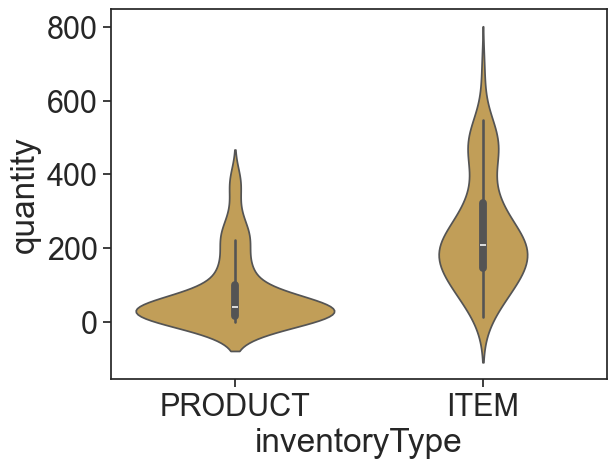

In [68]:
sns.violinplot(data=Inventory, 
               x="inventoryType", y="quantity"
               )
